In [1]:
import numpy as np

# Given data
X = np.array([1200, 1500, 1800, 2000, 2300])
Y = np.array([250, 300, 330, 360, 400])

# Step 1: Calculate the mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Step 2: Calculate the terms needed for the slope formula
numerator = np.sum((X - mean_x) * (Y - mean_y))
denominator = np.sum((X - mean_x) ** 2)

# Step 3: Calculate the slope (m) and intercept (b)
m = numerator / denominator
b = mean_y - (m * mean_x)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Step 4: Make a prediction
def predict(x):
    return m * x + b

# Predict price for a house size of 1900 square feet
predicted_price = predict(1900)
print(f"Predicted Price for 1900 sq.ft: {predicted_price} thousand dollars")


Slope (m): 0.13333333333333333
Intercept (b): 93.33333333333334
Predicted Price for 1900 sq.ft: 346.6666666666667 thousand dollars


In [2]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 3.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/11.0 MB 7.0 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 7.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 9.0 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/11.0 MB 9.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/11.0 MB 10.0 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.0 MB 10.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 11.0 MB/s eta 0:00:01
   --------------- ------------------------ 4.1/11.0 MB 11.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.8/11.0 MB 11.7 MB/s eta 0:00:01
   ------------------- -------------------- 5.3/11.0 MB 11.7 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/11.0 MB 11.6 MB/s eta 0:00:01

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [4]:
# Example: Manually creating a dataset
data = {
    'Size': [1200, 1500, 1800, 2000, 2300],
    'Price': [250, 300, 330, 360, 400]
}
df = pd.DataFrame(data)

# Alternatively, load from a CSV file
# df = pd.read_csv('path_to_your_file.csv')

print(df.head())


   Size  Price
0  1200    250
1  1500    300
2  1800    330
3  2000    360
4  2300    400


In [5]:
X = df[['Size']]  # Independent variable (House Size)
Y = df['Price']   # Dependent variable (House Price)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
# Step 1: Initialize the LinearRegression model
model = LinearRegression()

# Step 2: Fit the model to the training data
model.fit(X_train, Y_train)

# Get the slope (m) and intercept (b) of the linear model
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")


Slope (m): 0.1366795366795367
Intercept (b): 85.55984555984554


In [8]:
# Predict on test data
Y_pred = model.predict(X_test)

# Print the actual vs predicted values
for actual, predicted in zip(Y_test, Y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")

# Predict for a new house size
new_size = 1900
predicted_price = model.predict([[new_size]])
print(f"Predicted price for house size {new_size}: {predicted_price[0]} thousand dollars")


Actual: 300, Predicted: 290.57915057915056
Predicted price for house size 1900: 345.25096525096524 thousand dollars


C:\Users\satvi\anaconda3\envs\sv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (coefficient of determination)
r_squared = r2_score(Y_test, Y_pred)
print(f"R-squared: {r_squared}")


Mean Squared Error: 88.75240381031915
R-squared: nan


C:\Users\satvi\anaconda3\envs\sv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


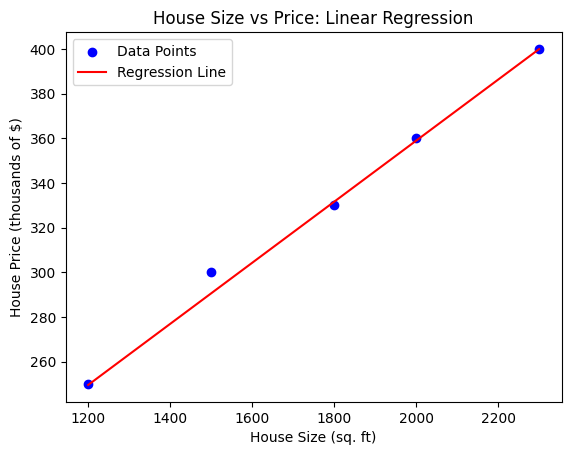

In [10]:
# Plot the data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.xlabel('House Size (sq. ft)')
plt.ylabel('House Price (thousands of $)')
plt.title('House Size vs Price: Linear Regression')
plt.legend()
plt.show()


Mean Squared Error: 88.75240381031915
R-squared: nan


C:\Users\satvi\anaconda3\envs\sv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


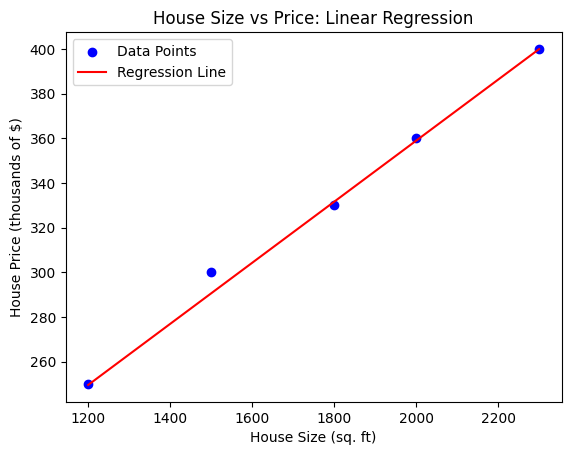

Predicted Price for 1900 sq.ft: 345.25096525096524 thousand dollars


C:\Users\satvi\anaconda3\envs\sv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Example dataset (House Size vs Price)
data = {
    'Size': [1200, 1500, 1800, 2000, 2300],
    'Price': [250, 300, 330, 360, 400]
}
df = pd.DataFrame(data)

# Define the independent (X) and dependent (Y) variables
X = df[['Size']]
Y = df['Price']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

# Plot the data points and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('House Size (sq. ft)')
plt.ylabel('House Price (thousands of $)')
plt.title('House Size vs Price: Linear Regression')
plt.legend()
plt.show()

# Predict for a new input (e.g., 1900 sq. ft house)
new_size = 1900
predicted_price = model.predict([[new_size]])
print(f"Predicted Price for 1900 sq.ft: {predicted_price[0]} thousand dollars")
